In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats= np.random.uniform(low=-90, high=90, size=1500)
lngs= np.random.uniform(low=-180, high=180, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and lognitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data=[]

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count =1
set_count =1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | pokaran
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | montepuez
Processing Record 11 of Set 1 | gat
Processing Record 12 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | yirol
City not found. Skipping...
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | fereydun kenar
Processing Record 18 of Set 1 | umm kaddadah
Processing Record 19 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 20 of Set 1 | marfi

Processing Record 35 of Set 4 | zelenoborskiy
Processing Record 36 of Set 4 | igboho
Processing Record 37 of Set 4 | port hedland
Processing Record 38 of Set 4 | lahaina
Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | terrace
Processing Record 41 of Set 4 | areka
Processing Record 42 of Set 4 | lokosovo
Processing Record 43 of Set 4 | ust-kulom
Processing Record 44 of Set 4 | comodoro rivadavia
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | neka
Processing Record 47 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 48 of Set 4 | wangou
Processing Record 49 of Set 4 | amderma
City not found. Skipping...
Processing Record 50 of Set 4 | dong hoi
Processing Record 1 of Set 5 | pringsewu
Processing Record 2 of Set 5 | mitsamiouli
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | ceara-mirim
City not found. Skipping...
Processing Record 6 of Set 5 | vila franca do c

Processing Record 28 of Set 8 | mocambique
City not found. Skipping...
Processing Record 29 of Set 8 | mehamn
Processing Record 30 of Set 8 | padang
Processing Record 31 of Set 8 | longhua
Processing Record 32 of Set 8 | saint-philippe
Processing Record 33 of Set 8 | lavrentiya
Processing Record 34 of Set 8 | ruteng
Processing Record 35 of Set 8 | calvinia
Processing Record 36 of Set 8 | roald
Processing Record 37 of Set 8 | hokitika
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | ouadda
Processing Record 40 of Set 8 | kishi
Processing Record 41 of Set 8 | tiksi
Processing Record 42 of Set 8 | san matias
Processing Record 43 of Set 8 | karratha
Processing Record 44 of Set 8 | morgan city
Processing Record 45 of Set 8 | asayita
City not found. Skipping...
Processing Record 46 of Set 8 | waslala
Processing Record 47 of Set 8 | nikolskoye
Processing Record 48 of Set 8 | slave lake
Processing Record 49 of Set 8 | phonhong
Processing Record 50 of Set 8 | dongsh

Processing Record 16 of Set 12 | am timan
Processing Record 17 of Set 12 | sisophon
Processing Record 18 of Set 12 | aitape
Processing Record 19 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 20 of Set 12 | oussouye
Processing Record 21 of Set 12 | jacareacanga
Processing Record 22 of Set 12 | weihe
Processing Record 23 of Set 12 | putina
Processing Record 24 of Set 12 | bushehr
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | camacha
Processing Record 27 of Set 12 | banjar
Processing Record 28 of Set 12 | nemuro
Processing Record 29 of Set 12 | caruray
Processing Record 30 of Set 12 | ixtapa
Processing Record 31 of Set 12 | martapura
Processing Record 32 of Set 12 | matay
Processing Record 33 of Set 12 | salinopolis
Processing Record 34 of Set 12 | burica
City not found. Skipping...
Processing Record 35 of Set 12 | jalingo
Processing Record 36 of Set 12 | solnechnyy
Processing Record 37 of Set 12 | niquelandia
Processing Record 38 of Set 

In [11]:
len(city_data)

573

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,46.47,92,100,3.38,NZ,2021-07-25 20:15:23
1,Cherskiy,68.7500,161.3000,45.93,63,23,7.20,RU,2021-07-25 20:15:23
2,Albany,42.6001,-73.9662,84.25,73,60,1.99,US,2021-07-25 20:12:11
3,Pokaran,26.9167,71.9167,87.55,69,100,21.97,IN,2021-07-25 20:15:24
4,Busselton,-33.6500,115.3333,58.08,65,8,20.58,AU,2021-07-25 20:15:24
5,Yellowknife,62.4560,-114.3525,64.33,51,56,1.01,CA,2021-07-25 20:10:57
6,Hobart,-42.8794,147.3294,43.05,71,40,1.01,AU,2021-07-25 20:14:45
7,Rikitea,-23.1203,-134.9692,70.65,67,38,6.42,PF,2021-07-25 20:15:25
8,Montepuez,-13.1256,38.9997,63.57,58,12,10.51,MZ,2021-07-25 20:15:25
9,Gat,31.6100,34.7642,82.81,78,1,7.27,IL,2021-07-25 20:15:26


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-07-25 20:15:23,-46.1927,168.8643,46.47,92,100,3.38
1,Cherskiy,RU,2021-07-25 20:15:23,68.7500,161.3000,45.93,63,23,7.20
2,Albany,US,2021-07-25 20:12:11,42.6001,-73.9662,84.25,73,60,1.99
3,Pokaran,IN,2021-07-25 20:15:24,26.9167,71.9167,87.55,69,100,21.97
4,Busselton,AU,2021-07-25 20:15:24,-33.6500,115.3333,58.08,65,8,20.58
...,...,...,...,...,...,...,...,...,...
568,Husavik,IS,2021-07-25 20:15:13,66.0449,-17.3389,57.16,64,100,6.26
569,Poum,NC,2021-07-25 20:17:42,-20.2333,164.0167,72.32,78,1,17.25
570,Lashio,MM,2021-07-25 20:18:59,22.9333,97.7500,67.62,99,99,0.60
571,Rio Gallegos,AR,2021-07-25 20:16:13,-51.6226,-69.2181,39.25,65,40,20.71


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# When I have to reload data if taking a break. 
# To avoid re-running randomization data every time
# load csv file
#city_data_to_load = "weather_data/cities.csv"

# Read csv file back into a DataFrame
#city_data_df = pd.read_csv(city_data_to_load)
#city_data_df.head()

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

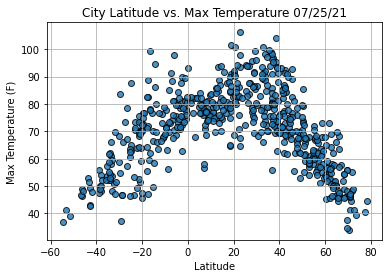

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps,edgecolor="black",
            linewidths=1, marker="o", alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

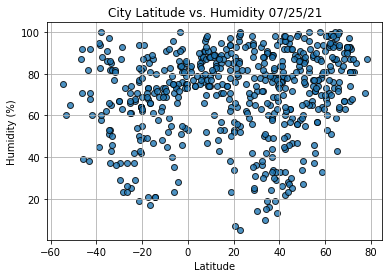

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

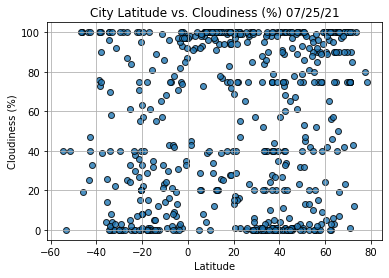

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

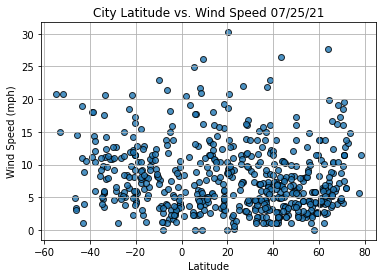

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()